In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import pickle
import numpy as np
import pandas as pd

In [58]:
with open("budget_mojo_imdb.pkl", 'r') as picklefile: 
    data = pickle.load(picklefile)

In [505]:
data[["Genre1","Genre2","Genre3"]] = data.Genres.apply(lambda x: pd.Series(','.join(x).split(","))) 
data

,Production_Budget,Domestic_Gross,cpi_date,Title,Box_Office,Noms,Wins,Rank,Studio,Total_Gross,...,Director,Actors,Genres,Rating,Actor1,Actor2,Actor3,Genre1,Genre2,Genre3
0,425000000,760507625,2009-12-01,Avatar,749766139,9,3,1,Fox,749766139,...,James Cameron,"(Sam Worthington, Zoe Saldana, Sigourney Weaver)","(Action, Adventure, Fantasy)",PG-13,Sam Worthington,Zoe Saldana,Sigourney Weaver,Action,Adventure,Fantasy
1,300000000,309420425,2007-05-01,Pirates of the Caribbean: At World's End,309420425,2,0,4,BV,309420425,...,Gore Verbinski,"(Johnny Depp, Orlando Bloom, Keira Knightley)","(Action, Adventure, Fantasy)",PG-13,Johnny Depp,Orlando Bloom,Keira Knightley,Action,Adventure,Fantasy
2,300000000,199285272,2015-11-01,Spectre,199151327,1,0,10,Sony,199270327,...,Sam Mendes,"(Daniel Craig, Christoph Waltz, Léa Seydoux)","(Action, Adventure, Thriller)",PG-13,Daniel Craig,Christoph Waltz,Léa Seydoux,Action,Adventure,Thriller
3,275000000,448139099,2012-07-01,The Dark Knight Rises,NaN,0,0,2,WB,448139099,...,Christopher Nolan,"(Christian Bale, Tom Hardy, Anne Hathaway)","(Action, Thriller)",PG-13,Christian Bale,Tom Hardy,Anne Hathaway,Action,Thriller,NaN
4,275000000,89289910,2013-07-01,The Lone Ranger,89302115,2,0,40,BV,89302115,...,Gore Verbinski,"(Johnny Depp, Armie Hammer, William Fichtner)","(Action, Adventure, Western)",PG-13,Johnny Depp,Armie Hammer,William Fichtner,Action,Adventure,Western
5,275000000,73058679,2012-03-01,John Carter,NaN,0,0,41,BV,73078100,...,Andrew Stanton,"(Taylor Kitsch, Lynn Collins, Willem Dafoe)","(Action, Adventure, Fantasy)",PG-13,Taylor Kitsch,Lynn Collins,Willem Dafoe,Action,Adventure,Fantasy
6,260000000,200821936,2010-11-01,Tangled,200821936,1,0,10,BV,200821936,...,Nathan Greno,"(Mandy Moore, Zachary Levi, Donna Murphy)","(Animation, Adventure, Comedy)",PG,Mandy Moore,Zachary Levi,Donna Murphy,Animation,Adventure,Comedy
7,258000000,336530303,2007-05-01,Spider-Man 3,NaN,0,0,1,Sony,336530303,...,Sam Raimi,"(Tobey Maguire, Kirsten Dunst, Topher Grace)","(Action, Adventure)",PG-13,Tobey Maguire,Kirsten Dunst,Topher Grace,Action,Adventure,NaN
8,250000000,303003568,2012-12-01,The Hobbit: An Unexpected Journey,303003568,3,0,5,WB (NL),303003568,...,Peter Jackson,"(Martin Freeman, Ian McKellen, Richard Armitage)","(Adventure, Fantasy)",PG-13,Martin Freeman,Ian McKellen,Richard Armitage,Adventure,Fantasy,NaN
9,250000000,301959197,2009-07-01,Harry Potter and the Half-Blood Prince,301959197,1,0,3,WB,301959197,...,David Yates,"(Daniel Radcliffe, Emma Watson, Rupert Grint)","(Adventure, Family, Fantasy)",PG,Daniel Radcliffe,Emma Watson,Rupert Grint,Adventure,Family,Fantasy


In [522]:
data["Genre"] = data.Genres.apply(lambda x: ','.join(x))
budget_dir = data[["Production_Budget", "Director","Genre"]].groupby("Director").aggregate({'Production_Budget':'mean', 'Genre': lambda x: ','.join(x) }).sort_values(by="Production_Budget", ascending=False).iloc[:30].reset_index()

In [524]:
budget_dir.to_csv('budget_csv.csv')

In [ ]:





data[["Production_Budget", "Director","Genre1","Genre2","Genre3"]].groupby("Director").mean().sort_values(by="Production_Budget",

In [515]:
budget_dir

,Director,Production_Budget
0,Nathan Greno,260000000
1,Lee Unkrich,200000000
2,Dan Scanlon,200000000
3,David Yates,200000000
4,Mark Andrews,185000000
5,Andrew Stanton,184500000
6,Robert Stromberg,180000000
7,Carl Rinsch,175000000
8,Rupert Sanders,170000000
9,Don Hall,165000000


In [225]:
imdb = pd.read_csv('3700_nodupes.csv')

In [275]:
imdbs = imdb[["OpenDate","Year","Genre"]]
imdbs.Year = imdbs.Year.apply(str)
imdbs["Date"] = imdbs.OpenDate.values + "/" + imdbs.Year.values
dates = []
imdbs = imdbs[imdbs.OpenDate != '2/29']

# pd.to_datetime('2/29/2006')
# pd.to_datetime(arg = imdbs.Date,infer_datetime_format='True') # format='%m/%d/%Y',exact=False)

/Users/ingrid/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [274]:
for i in range(0,len(imdbs)):
    try:
        dates.append(pd.to_datetime(imdbs.Date.iloc[i]))
    except:
        print imdbs.Date.iloc[i]

2/29/2006
2/29/2006
2/29/2007
2/29/2007


In [277]:
imdbs["Date"] = pd.to_datetime(arg = imdbs.Date,infer_datetime_format='True')

In [404]:
imdbs["yr"] = imdb["Year"]

In [442]:
imdb[["Genre1","Genre2","Genre3"]] = imdb['Genre'].apply(lambda x: pd.Series(x.split(",")))

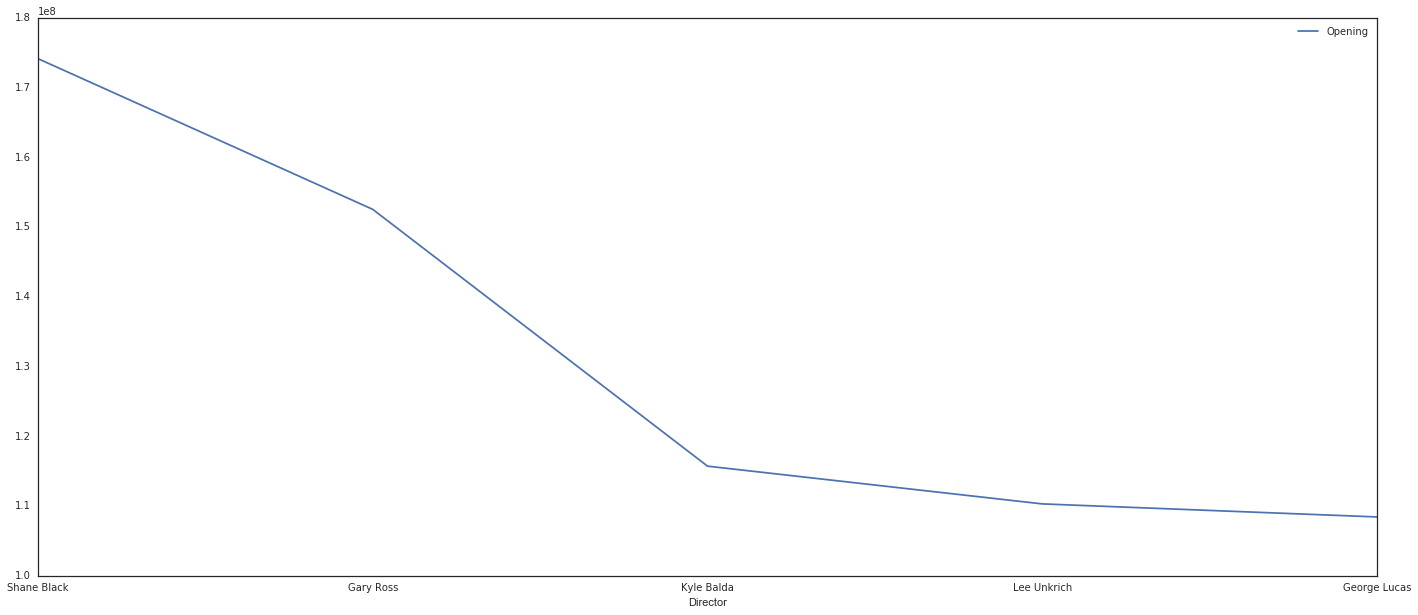

In [510]:
# grouped = imdb[["Genre","Director","Opening"]].groupby('Director')
uslte = grouped.aggregate({'Opening':'mean', 'Genre': lambda x: ','.join(x) }).reset_index().sort_values(by="Opening",ascending=False).iloc[:20]
# uslte.drop("Genre",axis=1).plot()
imdb[["Genre","Director","Opening"]].groupby('Director').mean().sort_values(by="Opening",ascending=False).iloc[0:5].plot()
open_dir = uslte[["Director","Opening"]]

In [512]:
open_dir

,Director,Opening
2104,Shane Black,1.741446e+08
776,Gary Ross,1.525357e+08
1351,Kyle Balda,1.157184e+08
1384,Lee Unkrich,1.103072e+08
797,George Lucas,1.084358e+08
425,Colin Trevorrow,1.044520e+08
1228,Joss Whedon,1.006789e+08
180,Artie Mandelberg,9.044027e+07
50,Alan Taylor,8.573784e+07
2041,Sam Raimi,8.503274e+07


In [525]:
sss = uslte.sort_values(by="Opening",ascending=False).iloc[:30]
sss[["genre_condesced"]] = sss.Genre.apply(lambda x: pd.Series(','.join(list(set(x.split(","))))))
sss.drop("Genre",axis=1,inplace=True)
# sss.Genre.loc[1555]

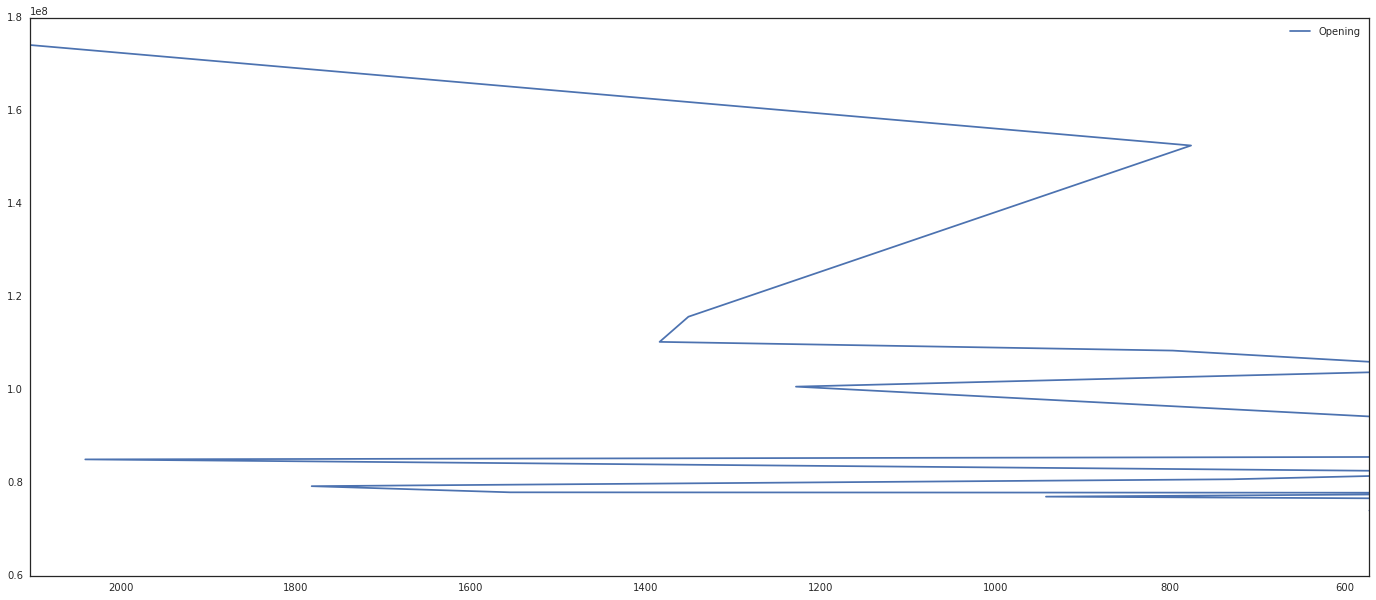

In [489]:
ssss = uslte.sort_values(by="Opening",ascending=False).iloc[:20].sort_values(by="Opening",ascending=False).plot()

In [485]:
# sss[["genre_condesced"]] = sss.genre_condesced.apply(lambda x: pd.Series(','.join(list(set(x.split(",").apply(lambda y: y.lstrip('\n').rstrip('\n')))))))
# sss.loc[408].genre_condesced

AttributeError: 'list' object has no attribute 'apply'

In [477]:
sss[["g1","g2","g3","g4","g5","g6","g7","g8","g9","g10","g12","g13","g22","g33","g44"]] = sss.genre_condesced.apply(lambda x: pd.Series(x.split(",")))

ValueError: Columns must be same length as key

In [527]:
sss.to_csv('opening_csv.csv')

In [534]:
budget_Opening = pd.merge(sss,budget_dir, on="Director" ).drop("Genre",axis=1)
budget_Opening.to_csv('budget_open.csv')
budget_Opening.set_index("Director").reset_index()

,Director,Opening,genre_condesced,Production_Budget
0,Lee Unkrich,110307189.0,"Comedy,Animation, Adventure",200000000
1,Alan Taylor,85737841.0,"Action, Fantasy, Adventure",152500000
2,Dan Scanlon,82429469.0,"Comedy,Animation, Adventure",200000000
3,Pete Docter,79274531.0,"Comedy,Animation, Adventure",145000000
4,Chris Miller,77853354.5,"Comedy,Animation, Adventure",145000000
5,David Yates,77472070.5,"Adventure, Fantasy, Family",200000000
6,Andrew Adamson,76209665.0,"Family,Animation,Adventure, Adventure,Action,...",131250000


In [526]:
sss

,Director,Opening,genre_condesced
2104,Shane Black,1.741446e+08,"Action, Sci-Fi, Adventure"
776,Gary Ross,1.525357e+08,"Drama, Sci-Fi,Adventure"
1351,Kyle Balda,1.157184e+08,"Comedy,Animation, Family"
1384,Lee Unkrich,1.103072e+08,"Comedy,Animation, Adventure"
797,George Lucas,1.084358e+08,"Action, Fantasy, Adventure"
425,Colin Trevorrow,1.044520e+08,"Sci-Fi, Drama, Adventure,Action,Comedy, Romance"
1228,Joss Whedon,1.006789e+08,"Action, Sci-Fi, Adventure"
180,Artie Mandelberg,9.044027e+07,"Drama,Crime"
50,Alan Taylor,8.573784e+07,"Action, Fantasy, Adventure"
2041,Sam Raimi,8.503274e+07,"Action,Horror, Fantasy, Adventure, Thriller"


In [451]:
 
imdb[["Genre","Director","Opening"]].groupby('Director').mean().sort_values(by="Opening",ascending=False).iloc[0:20]

,Opening
Director,
Shane Black,1.741446e+08
Gary Ross,1.525357e+08
Kyle Balda,1.157184e+08
Lee Unkrich,1.103072e+08
George Lucas,1.084358e+08
Colin Trevorrow,1.044520e+08
Joss Whedon,1.006789e+08
Artie Mandelberg,9.044027e+07
Alan Taylor,8.573784e+07


In [421]:
# imdbs.drop(["Date","Genre"],axis=1,inplace=True)
# res = imdbs.set_index('yr').unstack().reset_index().drop('level_0',axis=1)
res.columns = ["Year","Genre"]
for n,g in res.groupby("Genre"):
    print n,g

 Action       Year    Genre
3811  2004   Action
3887  2004   Action
3995  2006   Action
4111  2007   Action
4122  2007   Action
4178  2008   Action
4180  2008   Action
4244  2008   Action
4264  2008   Action
4276  2009   Action
4342  2009   Action
4363  2010   Action
4453  2011   Action
4477  2011   Action
4705  2014   Action
4710  2014   Action
5045  2005   Action
5206  2007   Action
5316  2009   Action
5381  2007   Action
5488  2011   Action
5766  2013   Action
5767  2013   Action
5790  2015   Action
5791  2015   Action
5881  2007   Action
5944  2005   Action
5953  2004   Action
6475  2014   Action
6598  2004   Action
6676  2006   Action
6921  2011   Action
7654  2011   Action
 Adult       Year   Genre
5862  2004   Adult
8062  2005   Adult
 Adventure        Year       Genre
3783   2009   Adventure
3787   2014   Adventure
3789   2014   Adventure
3790   2014   Adventure
3796   2013   Adventure
3807   2004   Adventure
3808   2004   Adventure
3813   2004   Adventure
3815   2004   Adventu

In [314]:
result = data[["Title","Open","Genres"]]
result["Genre"] = result.Genres.apply(lambda l: ', '.join(l))
result = result.drop(["Genres","Title"],axis=1)
# imdbs = imdbs.drop(["OpenDate","Year"],axis=1)
# result = result.set_index("Open")
# pd.concat([imdbs,result])
result.columns=["Date","Genre"]
# imdbs
all_genres = pd.concat([imdbs,result])
# all_genres = all_genres.drop_duplicates()
# all_genres
all_genres

/Users/ingrid/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Date,Genre
0,2005-02-25,"Action, Comedy"
1,2011-10-06,Adult
2,2006-03-17,"Drama, Mystery, Thriller"
3,2005-11-03,"Drama, Family"
4,2004-08-09,Drama
5,2009-02-02,"Action, Adventure"
6,2006-02-02,"Comedy, Horror, Sci-Fi"
7,2008-01-12,"Action, Crime"
8,2006-08-02,Horror
9,2014-06-15,"Action, Adventure"


In [283]:
# pd.concat([imdbs,result])

In [59]:
data.keys()

Index([u'Production_Budget', u'Domestic_Gross', u'cpi_date', u'Title',
       u'Box_Office', u'Noms', u'Wins', u'Rank', u'Studio', u'Total_Gross',
       u'Opening', u'Open', u'IMDB_Score', u'Users', u'Metascore', u'Director',
       u'Actors', u'Genres', u'Rating', u'Actor1', u'Actor2', u'Actor3'],
      dtype='object')

In [149]:
result = data[["Title","Open","Genres"]]
result["Genre"] = result.Genres.apply(lambda l: ', '.join(l))
result[["Genre1","Genre2","Genre3"]] = result['Genre'].apply(lambda x: pd.Series(x.split(",")))
result = result.drop("Genres",axis=1)
nresult = result.drop(["Genre", "Title"],axis=1)

/Users/ingrid/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [145]:
from collections import Counter
def genre_count(genre_list):
    cnt = Counter()
    for genre in genre_list:
        cnt[genre] += 1
    return dict(cnt).items()
test = ["Action","Action","Drama"]
genre_count(test)

[('Action', 2), ('Drama', 1)]

In [176]:
vv = nresult.set_index("Open")
nvv = vv.unstack()
nnvv = pd.DataFrame(nvv).reset_index().drop("level_0",axis=1).sort_values(by="Open")
nnvv.columns=["Date","Genre"]
genre_table = nnvv.set_index("Date")
genre_table.head()
ff = genre_table.resample('12M', how=genre_count)
ff.iloc[0]

Genre    [(Action, 2), ( Fantasy, 2), ( Adventure, 2)]
Name: 1980-02-29 00:00:00, dtype: object

In [224]:
genres = result.sort_values(by="Open")
genres = genres.drop_duplicates()
# if genres.head(100).iloc[0].Title == genres.head(100).iloc[1].Title:
#     print "hi"
# def counter(array_like):
#     return 
time_genres= genres.set_index('Open')
time_genres
nGenres = time_genres.Genre1
ff = nGenres.resample('12M', how=genre_count)
genre_columns = list(set(list(nGenres)))
genre_columns

rows = []
for i in range(0,len(ff)):
    t = pd.DataFrame.from_dict(dict(ff.iloc[i]),orient='index').T
    rows.append(t)
# t1 = pd.DataFrame.from_dict(dict(ff.iloc[2]),orient='index').T
# t2 = pd.DataFrame.from_dict(dict(ff.iloc[3]),orient='index').T
# t3 = pd.DataFrame.from_dict(dict(ff.iloc[4]),orient='index').T
bigdata = pd.concat(rows, ignore_index=True)
# dict(ff.iloc[2])
bigdata.fillna(0)




,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Thriller,Western
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,0,1,0,0,0,3,0,0,2,0,0,0,0,0,0,0
2,1,1,0,0,1,0,0,1,0,0,2,0,0,0,0,0,0,0
3,3,1,0,0,6,0,0,0,0,0,3,0,0,0,0,1,0,0
4,1,0,0,0,2,1,0,1,0,0,2,0,0,0,0,0,0,0
5,4,0,0,1,2,2,0,0,0,0,1,0,0,0,0,0,0,0
6,2,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
7,2,1,0,1,1,1,0,2,0,0,1,0,0,0,0,0,0,0
8,6,2,0,2,3,1,0,3,0,0,0,0,0,0,0,0,0,0
9,5,0,0,1,2,1,0,3,0,0,1,0,0,0,0,0,0,0


In [316]:
nbigdate = bigdata.fillna(0)

In [326]:
# pd.DataFrame(ff).reset_index()
# len(nbigdate)
nbigdate["Date"] = pd.DataFrame(ff).reset_index().Open

In [395]:
nbigdate.reset_index()

,Date,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Thriller,Western
0,1980-02-29,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1981-02-28,2,1,0,1,0,0,0,3,0,0,2,0,0,0,0,0,0,0
2,1982-02-28,1,1,0,0,1,0,0,1,0,0,2,0,0,0,0,0,0,0
3,1983-02-28,3,1,0,0,6,0,0,0,0,0,3,0,0,0,0,1,0,0
4,1984-02-29,1,0,0,0,2,1,0,1,0,0,2,0,0,0,0,0,0,0
5,1985-02-28,4,0,0,1,2,2,0,0,0,0,1,0,0,0,0,0,0,0
6,1986-02-28,2,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
7,1987-02-28,2,1,0,1,1,1,0,2,0,0,1,0,0,0,0,0,0,0
8,1988-02-29,6,2,0,2,3,1,0,3,0,0,0,0,0,0,0,0,0,0
9,1989-02-28,5,0,0,1,2,1,0,3,0,0,1,0,0,0,0,0,0,0


In [333]:
nbigdate.set_index("Date",inplace=True)


KeyError: 'Date'

In [334]:
nbigd = nbigdate.reset_index()

In [538]:
nbigdate.sum().sort_values(ascending=False).to_exel('ld')

Comedy         854
Action         654
Drama          564
Crime          211
Adventure      181
Biography      169
Animation      151
Horror         135
Documentary     55
Mystery         17
Thriller        11
Sci-Fi          10
Fantasy          6
Romance          5
Family           2
Music            2
Musical          1
Western          1
dtype: float64

In [377]:
# d = nbigd.Date
# ys = nbigd.drop("Date",axis=1)
# ys = ys.astype(int)
# ax.stackplot(d, *[ys[col] for col in ["Comedy","Crime","Documentary"]])
# ax.stackplot(d.values, *[ts for col, ts in ys.iteritems()])
yzz = np.array(ys)

In [348]:
y_set = np.array(ys)
x = d
yz = np.arange(37)

# l = []
# for arr in y_set:
#     l.append(arr)
#     print arr
# yz = np.row_stack(l)

ValueError: Argument dimensions are incompatible

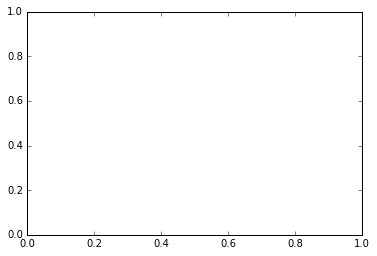

In [383]:
fig, ax = plt.subplots()
ax.stackplot(yzz,yz)
plt.show()

# print len(x),len(yz)
# fig, ax = plt.subplots()
# ax.stackplot(x, y1, y2, y3)
# plt.show()

In [57]:
# location_df = result['Genre'].apply(lambda x: pd.Series(x.split("")))
result.rename(columns={"Genre": "Genre1, Genre2, Genre3"},inplace=True)

[[11 40 17  6 33 41 38 33 40 49]
 [26 22 37 20 23 41 48 47 17 31]
 [37 34 23 12 41 45  5 45 35 47]] [0 1 2 3 4 5 6 7 8 9]
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 1 0 1 0 0 0 3 0 0 2 0 0 0 0 0 0 0]
 [1 1 0 0 1 0 0 1 0 0 2 0 0 0 0 0 0 0]] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36]


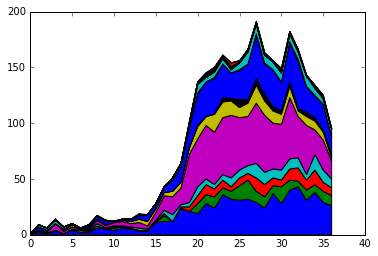

In [396]:
import numpy as np
import matplotlib.pyplot as plt


def fnx():
    return np.random.randint(5, 50, 10)

y = np.row_stack([(fnx(), fnx(), fnx())])
x = np.arange(10)
xss = np.arange(37)
y1, y2, y3 = fnx(), fnx(), fnx()
print y, x
print yzz[0:3], yz
fig, ax = plt.subplots()
ax.stackplot(yz,yzz.transpose())
areaLabels=['area1','area2','area3']
plt.show()

# fig, ax = plt.subplots()
# ax.stackplot(x, y1, y2, y3)
# plt.show()

In [35]:
# genre1["Genres"] = genre1.Genre.apply(lambda x: x.split(","))

In [7]:
genre2 = data[["Title","Genres"]]

In [9]:
# genre2["Genre"] = genre2.Genres.apply(lambda l: list(l))

/Users/ingrid/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [3]:
imdb = pd.read_csv('3700_nodupes.csv')

In [ ]:
result = pd.concat(frames)

In [4]:
imdb

,Unnamed: 0,Title,studio,TotalGross,Theatres,Opening,OpenDate,OpenMonth,OpenDay,Cast3,...,avg_imdbRating_Cast0,avg_imdbRating_Cast1,avg_imdbRating_Cast2,avg_imdbRating_Cast3,datetime,AdjTotalGross,AdjOpening,LogTotalGross,LogTheatres,LogOpening
0,1,Man of the House,Sony,19699706,2422,8917251,2/25,2,25,Paula Garcé,...,-1.000000,5.600000,-1.000,-1.000000,2005-01-01,196997.06,89172.51,12.190944,7.792349,11.398328
1,2,Assassins,WB,30303072,2343,9378637,10/6,10,6,Bibi Jone,...,6.300000,6.150000,5.200,-1.000000,2011-01-01,303030.72,93786.37,12.621589,7.759187,11.448775
2,3,Circle of Friends,Sav.,23389975,902,125587,3/17,3,17,Paula Costai,...,4.850000,-1.000000,-1.000,-1.000000,2006-01-01,233899.75,1255.87,12.362648,6.804615,7.135584
3,4,Home for the Holidays,Par.,17519169,1000,4007717,11/3,11,3,John Nova,...,-1.000000,-1.000000,5.600,-1.000000,2005-01-01,175191.69,40077.17,12.073636,6.907755,10.598562
4,5,Jack,BV,58620973,2232,11191496,8/9,8,9,Erich Anderso,...,-1.000000,-1.000000,-1.000,-1.000000,2004-01-01,586209.73,111914.96,13.281433,7.710653,11.625495
5,6,Black Sheep,Par.,32417995,2092,10593609,2/2,2,2,José Luis Córdob,...,-1.000000,-1.000000,-1.000,-1.000000,2009-01-01,324179.95,105936.09,12.689054,7.645876,11.570591
6,7,Black Sheep,Par.,32417995,2092,10593609,2/2,2,2,Tammy Davi,...,-1.000000,-1.000000,-1.000,-1.000000,2006-01-01,324179.95,105936.09,12.689054,7.645876,11.570591
7,8,Eye for an Eye,Par.,26877589,1680,6968044,1/12,1,12,Byung-joon Le,...,-1.000000,-1.000000,-1.000,-1.000000,2008-01-01,268775.89,69680.44,12.501633,7.426549,11.151675
8,9,Chain Reaction,Fox,21226204,2256,7545944,8/2,8,2,Luca Mari,...,-1.000000,-1.000000,-1.000,-1.000000,2006-01-01,212262.04,75459.44,12.265577,7.721349,11.231351
9,10,Hercules,BV,99112101,2930,249567,6/15,6,15,Rufus Sewel,...,6.050000,6.000000,6.150,7.600000,2014-01-01,991121.01,2495.67,13.806592,7.982758,7.822313


In [ ]:
import requests
import pandas as pd
from lxml import html

yr = 2014
url = "http://www.boxofficemojo.com/oscar/chart/?yr="+str(yr)+"&view=allmovies&p=.htm"
page = html.fromstring(requests.get(url).text)
df = pd.read_html(html.tostring(page.cssselect('table table')[0]))[0]

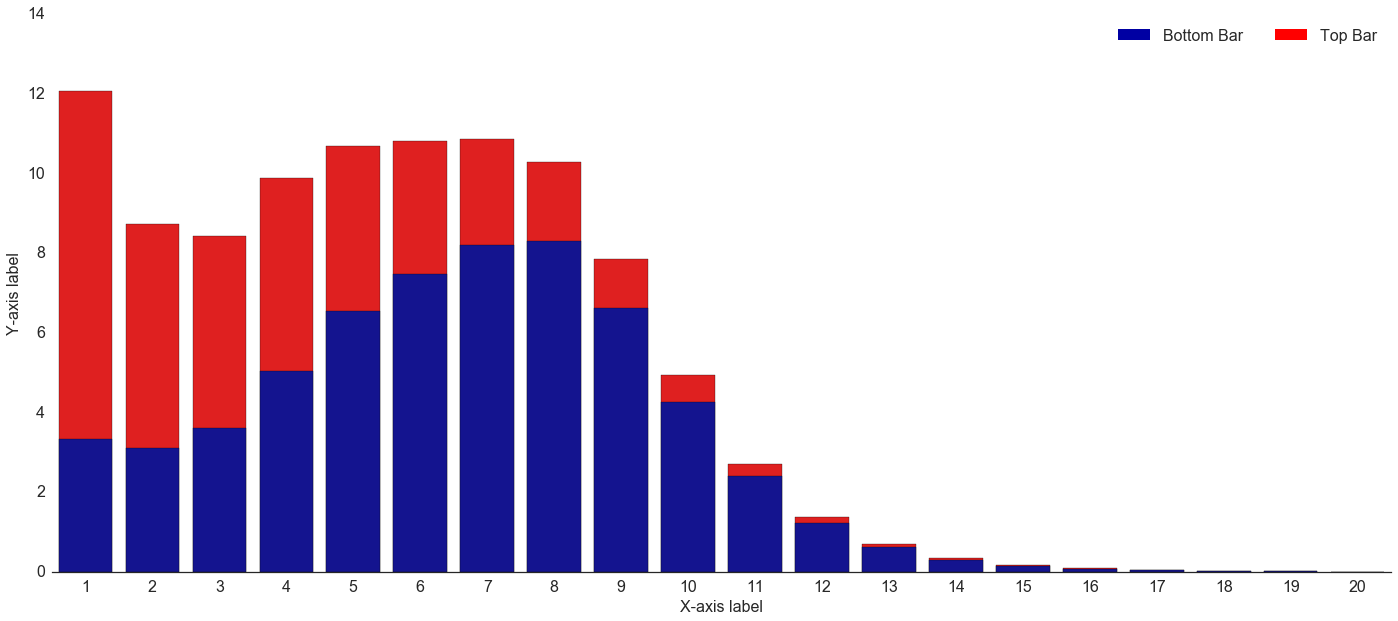

In [398]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

#Read in data & create total column
stacked_bar_data = pd.read_csv("stacked_bar.csv")
stacked_bar_data["total"] = stacked_bar_data.Series1 + stacked_bar_data.Series2

#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
sns.barplot(x = stacked_bar_data.Group, y = stacked_bar_data.total, color = "red")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = stacked_bar_data.Group, y = stacked_bar_data.Series1, color = "#0000A3")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Bottom Bar', 'Top Bar'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Y-axis label")
bottom_plot.set_xlabel("X-axis label")

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)